In [1]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
import folium
import matplotlib.cm as cm
from rasterio.transform import from_origin
import pandas as pd
from tqdm import tqdm
import matplotlib
from rasterio.warp import transform_bounds

In [2]:
#Fonction pour remettre les valeurs entre 0 et 1

def reshape_values(image):
    new = (image-np.min(image))/(np.max(image)-np.min(image))



    return new

In [3]:
def replace_by_value(image, seuil, repl_value):
    smoothed_image = np.copy(image)
    
    for i in range(smoothed_image.shape[0]):
        for j in range(smoothed_image.shape[1]):
            if smoothed_image[i][j]<seuil:
                smoothed_image[i][j]=repl_value

    return smoothed_image

In [4]:
def replace_over_by_value(image, seuil, repl_value):
    smoothed_image = np.copy(image)
    
    for i in range(smoothed_image.shape[0]):
        for j in range(smoothed_image.shape[1]):
            if smoothed_image[i][j]>seuil:
                smoothed_image[i][j]=repl_value

    return smoothed_image

In [5]:
def replace_by_mean(image, seuil):
    # Créez une copie de l'image pour ne pas modifier l'original
    smoothed_image = np.copy(image)

   # Parcourez chaque pixel de l'image
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            if image[i, j] < -seuil:
                # Définissez le voisinage (3x3) autour du pixel (i, j)
                neighborhood = image[i-1:i+2, j-1:j+2]
                # Appliquez un masque pour exclure les valeurs inférieures à -10,000
                filtered_neighborhood = neighborhood[neighborhood >= seuil]
                if len(filtered_neighborhood) > 0:
                    # Calculez la moyenne des pixels du voisinage
                    neighbor_mean = np.mean(filtered_neighborhood)
                    # Remplacez la valeur négative par la moyenne des voisins
                    smoothed_image[i, j] = neighbor_mean

    return smoothed_image

In [6]:
def count_values_below_threshold(image, threshold):
    count = 0  # Initialisation du compteur

    # Parcourez chaque pixel de l'image
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i, j] < threshold:
                count += 1  # Incrémente le compteur si la valeur est inférieure au seuil

    return count

In [7]:
def save_new_raster(path, output_filename, new_data) :
      #ouverture du fichier et récupération des infos
    with rasterio.open(path)  as data:
        ville = data.read(1)
        crs= data.crs
        bounds = data.bounds
        dtype = new_data.dtype
        count= data.count
        resolution_x = data.res[0]  
        resolution_y = data.res[1]
        transform = data.transform
        bounds=data.bounds

    #enregirstement du raster découper
    with rasterio.open(output_filename, 'w', driver='GTiff', width=data.shape[1], height=data.shape[0], count=count, dtype=dtype, transform=transform, crs=crs, bounds=bounds) as dst:
        dst.write(new_data, 1)

In [8]:
paths = [
    'raster_decoup_init/temp1_LH.tif',
    'raster_decoup_init/temp2_LH.tif',
    'raster_decoup_init/temp4_LH.tif',
    'raster_decoup_init/temp5_LH.tif',
    'raster_decoup_init/temp6_LH.tif',
    'raster_decoup_init/temp7_LH.tif',
    'raster_decoup_init/temp8_LH.tif',
    'raster_decoup_init/temp9_LH.tif',
    'raster_decoup_init/PPI_LH.tif',
    'raster_decoup_init/FAPAR_LH.tif'
]

In [120]:
file_names = [
    'temp1_LH_clean.tif',
    'temp2_LH_clean.tif',
    'temp3_LH_clean.tif',
    'temp4_LH_clean.tif',
    'temp5_LH_clean.tif',
    'temp6_LH_clean.tif',
    'temp7_LH_clean.tif',
    'temp8_LH_clean.tif',
    'PPI_LH_clean.tif',
    'FAPAR_LH_clean.tif'
]

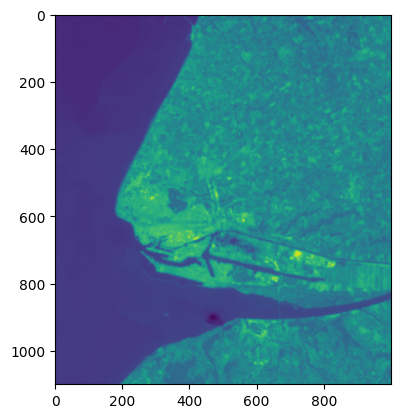

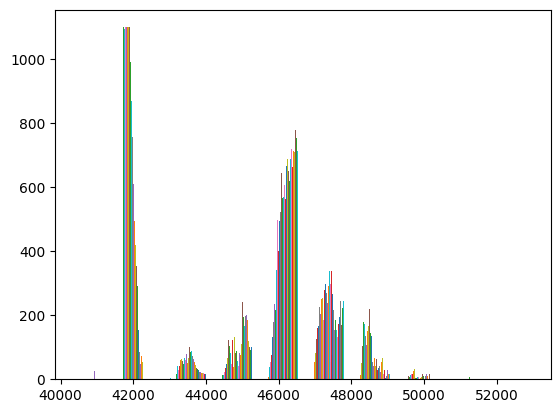

In [10]:
i = 0
with rasterio.open(paths[i])  as data :
    band1=data.read(1)
    show(band1)
    plt.hist(band1)

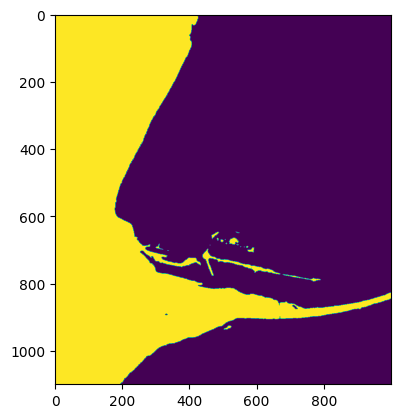

<Axes: >

In [15]:
show(band1<44000)

In [25]:
new_data = replace_by_value(band1, 44000, 44000)

(array([[1100.,    0.,    0., ...,    0.,    0.,    0.],
        [1100.,    0.,    0., ...,    0.,    0.,    0.],
        [1100.,    0.,    0., ...,    0.,    0.,    0.],
        ...,
        [  42.,  353.,  502., ...,    0.,    0.,    0.],
        [  47.,  361.,  504., ...,    0.,    0.,    0.],
        [  46.,  380.,  489., ...,    0.,    0.,    0.]]),
 array([44000. , 44900.2, 45800.4, 46700.6, 47600.8, 48501. , 49401.2,
        50301.4, 51201.6, 52101.8, 53002. ]),
 <a list of 1000 BarContainer objects>)

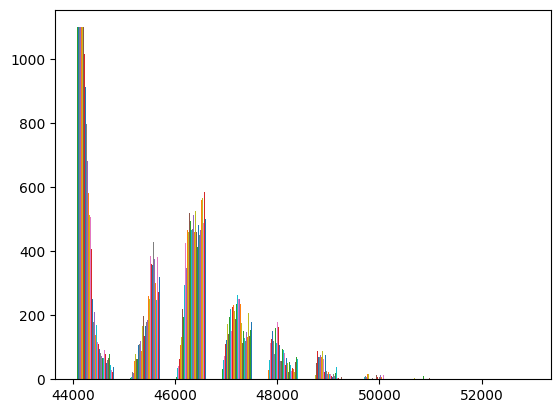

In [26]:
plt.hist(new_data)

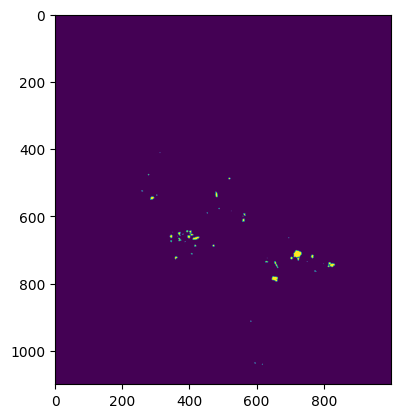

<Axes: >

In [23]:
show(new_data>50000)

In [27]:
new_data = replace_over_by_value(new_data, 50000, 50000)

(array([[1.10e+03, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
        [1.10e+03, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
        [1.10e+03, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
        ...,
        [2.10e+01, 6.60e+01, 3.06e+02, ..., 3.00e+00, 0.00e+00, 0.00e+00],
        [2.50e+01, 6.30e+01, 3.20e+02, ..., 1.00e+00, 0.00e+00, 0.00e+00],
        [2.60e+01, 6.90e+01, 3.28e+02, ..., 0.00e+00, 0.00e+00, 0.00e+00]]),
 array([44000., 44600., 45200., 45800., 46400., 47000., 47600., 48200.,
        48800., 49400., 50000.]),
 <a list of 1000 BarContainer objects>)

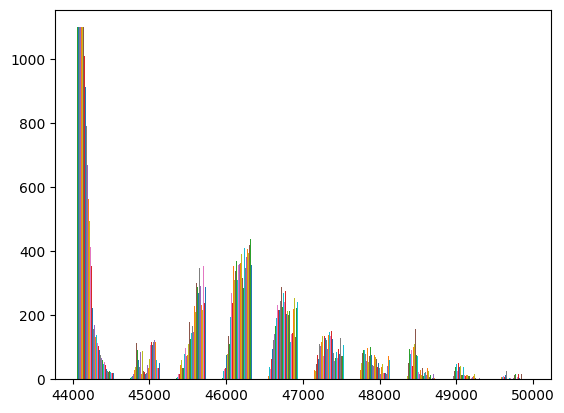

In [28]:
plt.hist(new_data)

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 1000, 'height': 1100, 'count': 1, 'crs': CRS.from_epsg(32631), 'transform': Affine(30.0, 0.0, 282285.0,
       0.0, -30.0, 5505915.0)}


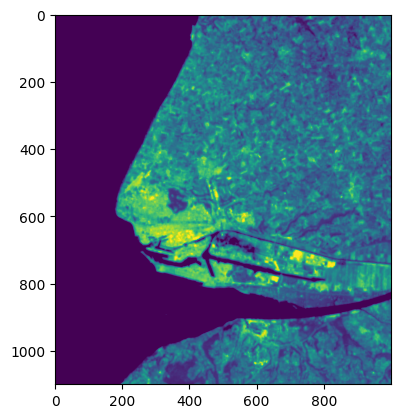

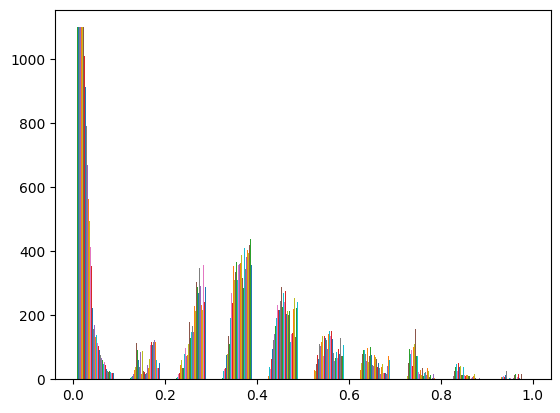

In [30]:
new = reshape_values(new_data)
save_new_raster(paths[i], file_names[i], new)
with rasterio.open(file_names[i]) as data :
    print(data.meta)
    band= data.read(1)
    show(band)
    plt.hist(band)

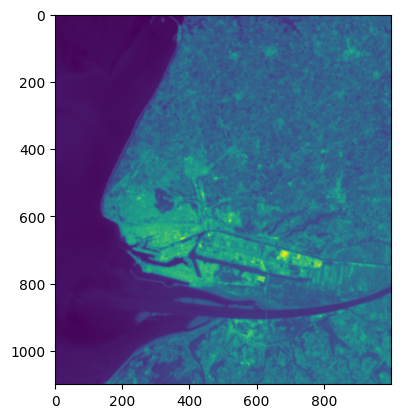

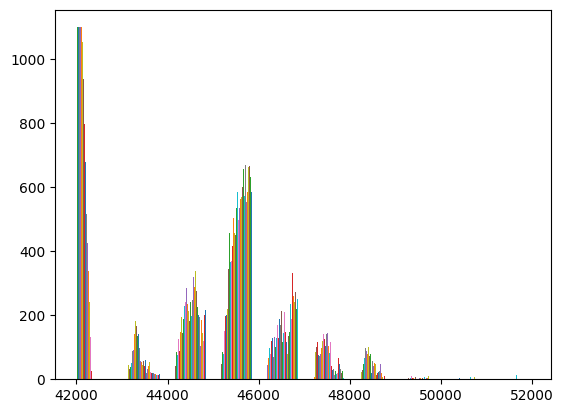

In [31]:
i = 1
with rasterio.open(paths[i])  as data :
    band1=data.read(1)
    show(band1)
    plt.hist(band1)

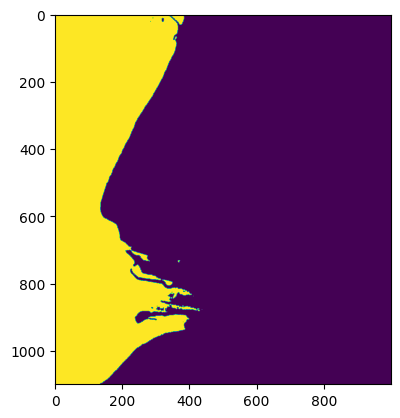

<Axes: >

In [38]:
show(band1<43000)

In [39]:
new_data = replace_by_value(band1, 43000, 43000)

(array([[1100.,    0.,    0., ...,    0.,    0.,    0.],
        [1100.,    0.,    0., ...,    0.,    0.,    0.],
        [1100.,    0.,    0., ...,    0.,    0.,    0.],
        ...,
        [  13.,  140.,  481., ...,    0.,    0.,    0.],
        [  14.,  148.,  510., ...,    0.,    0.,    0.],
        [  14.,  135.,  542., ...,    0.,    0.,    0.]]),
 array([43000. , 43902.5, 44805. , 45707.5, 46610. , 47512.5, 48415. ,
        49317.5, 50220. , 51122.5, 52025. ]),
 <a list of 1000 BarContainer objects>)

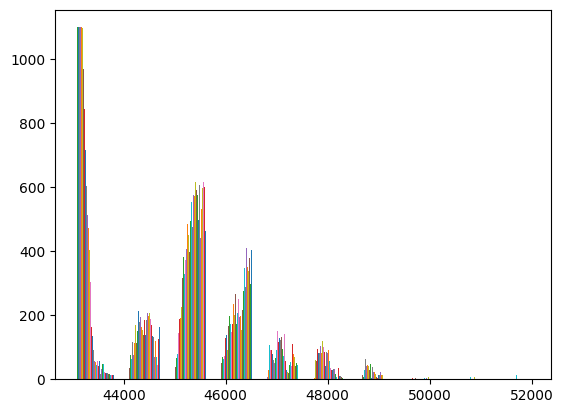

In [40]:
plt.hist(new_data)

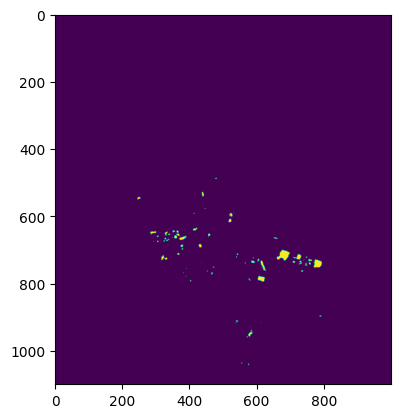

<Axes: >

In [46]:
show(band1>49000)

In [47]:
new_data = replace_over_by_value(new_data, 49000, 49000)

(array([[1100.,    0.,    0., ...,    0.,    0.,    0.],
        [1100.,    0.,    0., ...,    0.,    0.,    0.],
        [1100.,    0.,    0., ...,    0.,    0.,    0.],
        ...,
        [   0.,   18.,  133., ...,    7.,    0.,    0.],
        [   0.,   23.,  134., ...,   11.,    0.,    0.],
        [   0.,   24.,  122., ...,   16.,    4.,    0.]]),
 array([43000., 43600., 44200., 44800., 45400., 46000., 46600., 47200.,
        47800., 48400., 49000.]),
 <a list of 1000 BarContainer objects>)

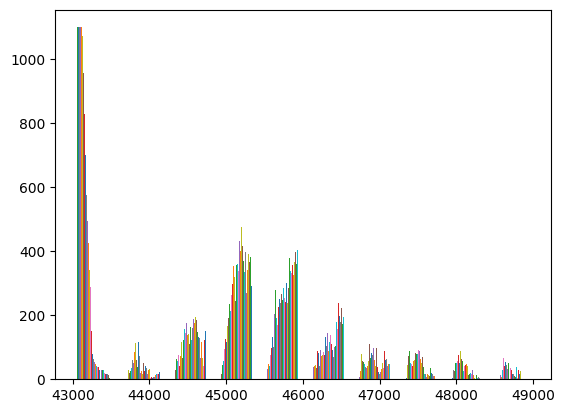

In [48]:
plt.hist(new_data)

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 1000, 'height': 1100, 'count': 1, 'crs': CRS.from_epsg(32631), 'transform': Affine(30.0, 0.0, 283485.0,
       0.0, -30.0, 5505915.0)}


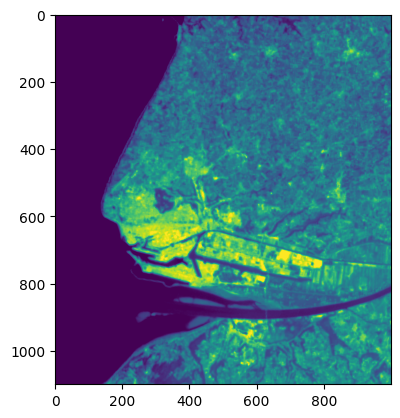

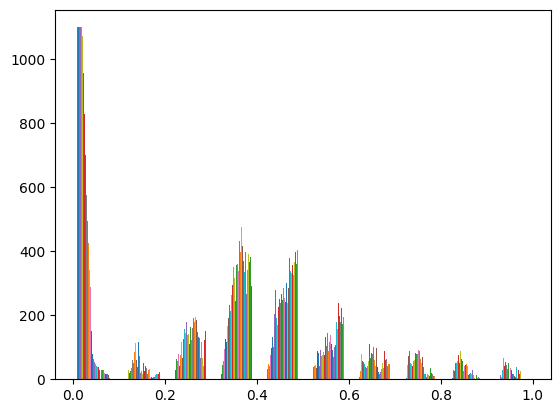

In [49]:
new = reshape_values(new_data)
save_new_raster(paths[i], file_names[i], new)
with rasterio.open(file_names[i]) as data :
    print(data.meta)
    band= data.read(1)
    show(band)
    plt.hist(band)

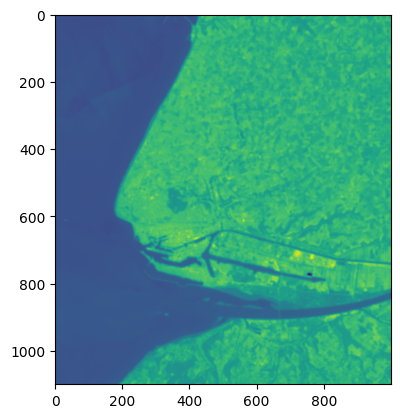

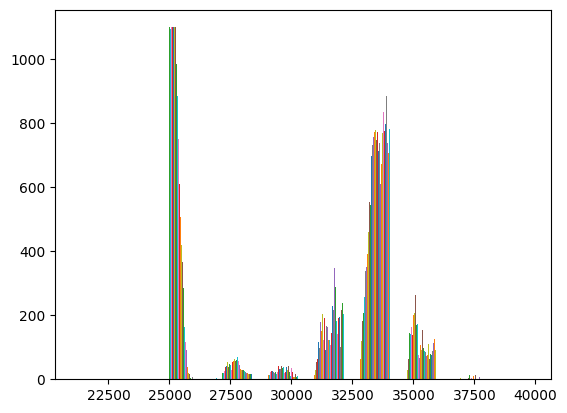

In [50]:
i = 2
with rasterio.open(paths[i])  as data :
    band1=data.read(1)
    show(band1)
    plt.hist(band1)

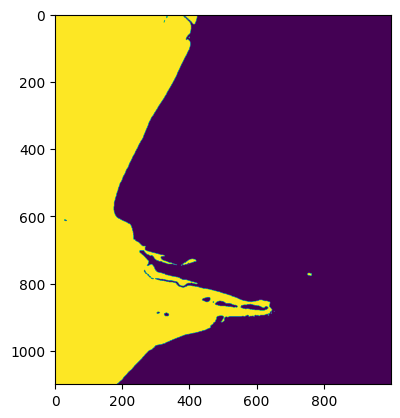

<Axes: >

In [53]:
show(band1<27000)

(array([[1100.,    0.,    0., ...,    0.,    0.,    0.],
        [1100.,    0.,    0., ...,    0.,    0.,    0.],
        [1100.,    0.,    0., ...,    0.,    0.,    0.],
        ...,
        [  16.,    4.,   12., ...,    0.,    0.,    0.],
        [  15.,    5.,   10., ...,    0.,    0.,    0.],
        [  16.,    4.,   10., ...,    0.,    0.,    0.]]),
 array([27000., 28290., 29580., 30870., 32160., 33450., 34740., 36030.,
        37320., 38610., 39900.]),
 <a list of 1000 BarContainer objects>)

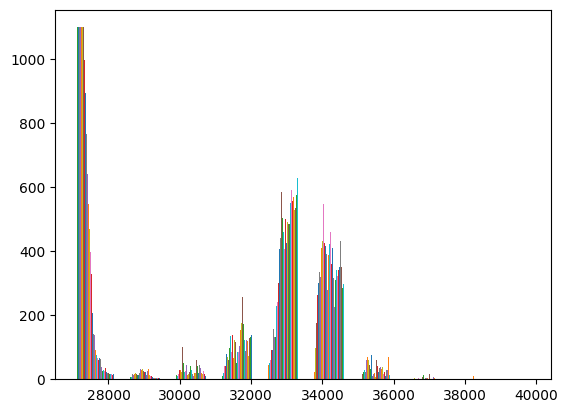

In [55]:
new_data = replace_by_value(band1, 27000, 27000)
plt.hist(new_data)

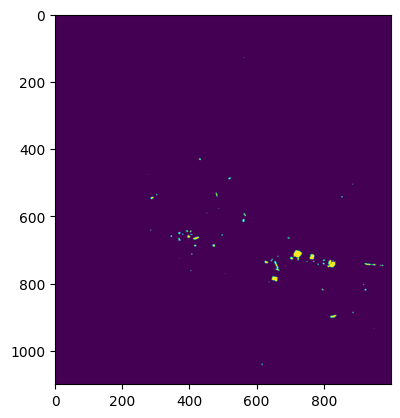

<Axes: >

In [58]:
show(new_data>36000)

(array([[1.10e+03, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
        [1.10e+03, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
        [1.10e+03, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
        ...,
        [1.30e+01, 5.00e+00, 3.00e+00, ..., 3.34e+02, 1.29e+02, 1.00e+00],
        [1.30e+01, 4.00e+00, 4.00e+00, ..., 3.53e+02, 1.22e+02, 1.00e+00],
        [1.20e+01, 6.00e+00, 2.00e+00, ..., 3.53e+02, 1.09e+02, 3.00e+00]]),
 array([27000., 27900., 28800., 29700., 30600., 31500., 32400., 33300.,
        34200., 35100., 36000.]),
 <a list of 1000 BarContainer objects>)

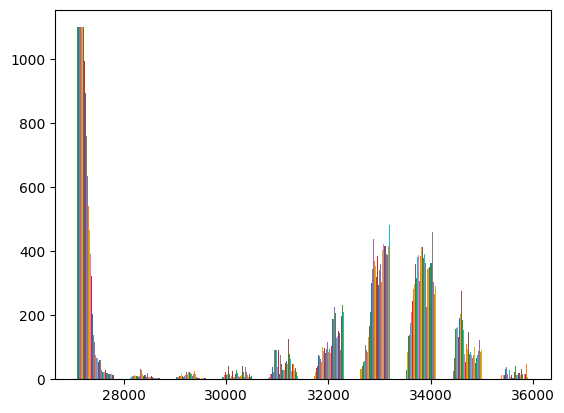

In [59]:
new_data = replace_over_by_value(new_data, 36000, 36000)
plt.hist(new_data)

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 1000, 'height': 1100, 'count': 1, 'crs': CRS.from_epsg(32631), 'transform': Affine(30.0, 0.0, 282285.0,
       0.0, -30.0, 5505915.0)}


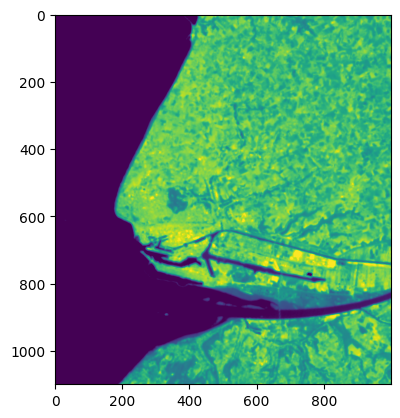

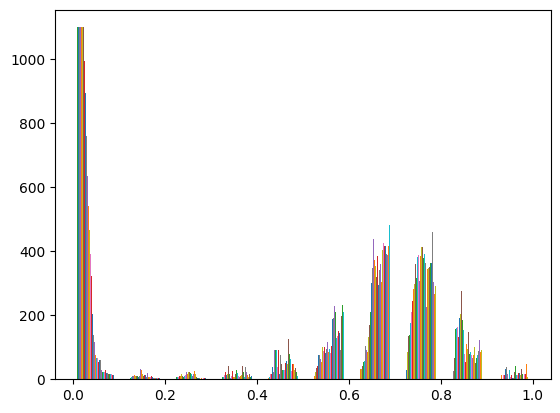

In [60]:
new = reshape_values(new_data)
save_new_raster(paths[i], file_names[i], new)
with rasterio.open(file_names[i]) as data :
    print(data.meta)
    band= data.read(1)
    show(band)
    plt.hist(band)

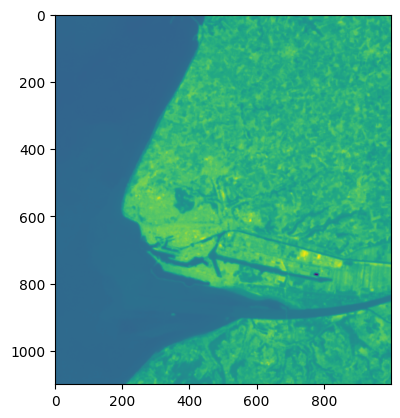

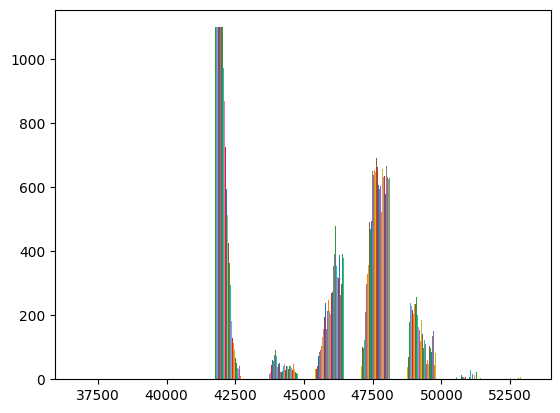

In [61]:
i = 3
with rasterio.open(paths[i])  as data :
    band1=data.read(1)
    show(band1)
    plt.hist(band1)

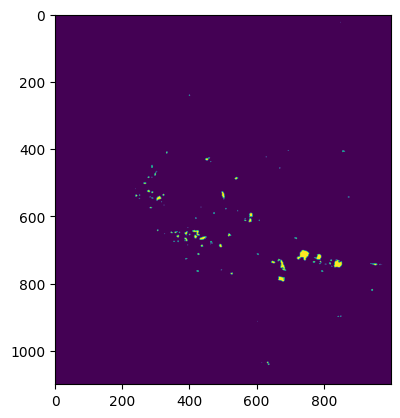

<Axes: >

In [68]:
show(band1>50000)

(array([[1100.,    0.,    0., ...,    0.,    0.,    0.],
        [1100.,    0.,    0., ...,    0.,    0.,    0.],
        [1100.,    0.,    0., ...,    0.,    0.,    0.],
        ...,
        [  15.,   13.,   94., ...,    0.,    0.,    0.],
        [  14.,   12.,  111., ...,    0.,    0.,    0.],
        [  14.,   10.,  121., ...,    0.,    0.,    0.]]),
 array([43000. , 44033.4, 45066.8, 46100.2, 47133.6, 48167. , 49200.4,
        50233.8, 51267.2, 52300.6, 53334. ]),
 <a list of 1000 BarContainer objects>)

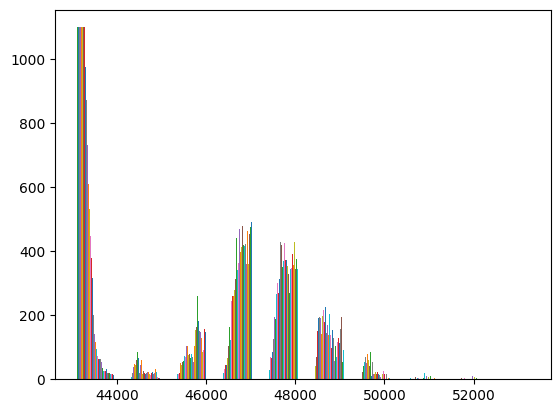

In [64]:
new_data = replace_by_value(band1, 43000, 43000)
plt.hist(new_data)

(array([[1100.,    0.,    0., ...,    0.,    0.,    0.],
        [1100.,    0.,    0., ...,    0.,    0.,    0.],
        [1100.,    0.,    0., ...,    0.,    0.,    0.],
        ...,
        [   8.,    9.,   12., ...,  116.,    3.,    5.],
        [   8.,    8.,   12., ...,  117.,    3.,    5.],
        [   8.,    8.,    8., ...,   94.,    3.,    5.]]),
 array([43000., 43700., 44400., 45100., 45800., 46500., 47200., 47900.,
        48600., 49300., 50000.]),
 <a list of 1000 BarContainer objects>)

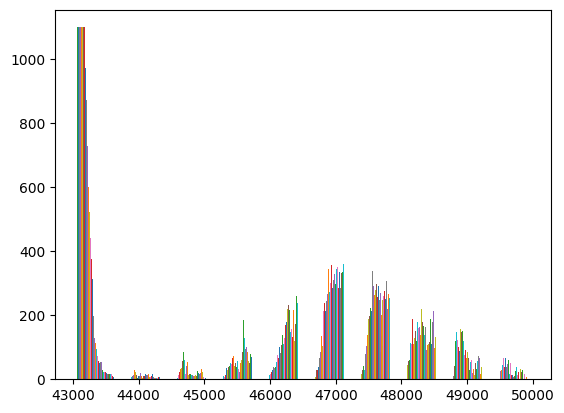

In [69]:
new_data = replace_over_by_value(new_data, 50000, 50000)
plt.hist(new_data)

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 1000, 'height': 1100, 'count': 1, 'crs': CRS.from_epsg(32631), 'transform': Affine(30.0, 0.0, 281685.0,
       0.0, -30.0, 5505915.0)}


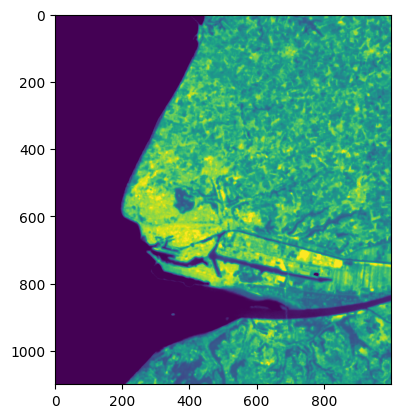

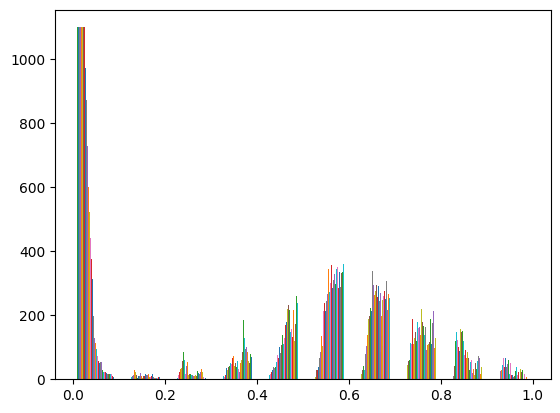

In [70]:
new = reshape_values(new_data)
save_new_raster(paths[i], file_names[i], new)
with rasterio.open(file_names[i]) as data :
    print(data.meta)
    band= data.read(1)
    show(band)
    plt.hist(band)

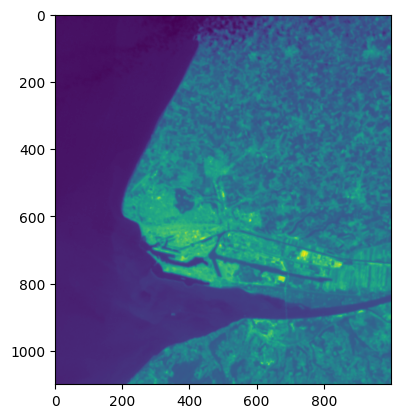

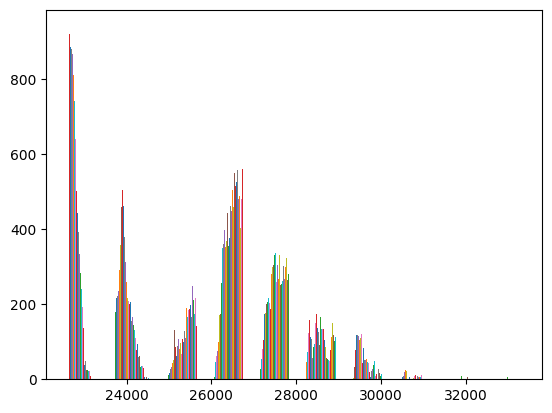

In [71]:
i = 4
with rasterio.open(paths[i])  as data :
    band1=data.read(1)
    show(band1)
    plt.hist(band1)

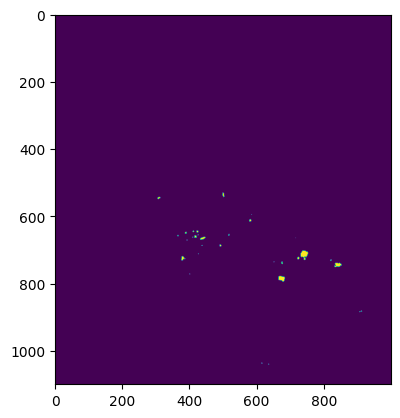

<Axes: >

In [78]:
show(band1>31000)

(array([[1100.,    0.,    0., ...,    0.,    0.,    0.],
        [1100.,    0.,    0., ...,    0.,    0.,    0.],
        [1100.,    0.,    0., ...,    0.,    0.,    0.],
        ...,
        [ 137.,  412.,  322., ...,    0.,    0.,    0.],
        [ 143.,  407.,  315., ...,    0.,    0.,    0.],
        [ 157.,  398.,  297., ...,    0.,    0.,    0.]]),
 array([25000. , 25837.1, 26674.2, 27511.3, 28348.4, 29185.5, 30022.6,
        30859.7, 31696.8, 32533.9, 33371. ]),
 <a list of 1000 BarContainer objects>)

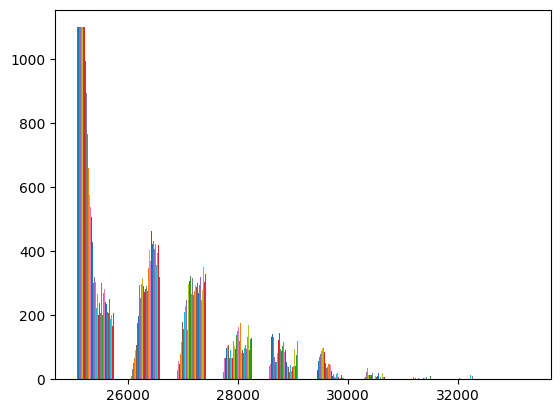

In [74]:
new_data = replace_by_value(band1, 25000, 25000)
plt.hist(new_data)

(array([[1100.,    0.,    0., ...,    0.,    0.,    0.],
        [1100.,    0.,    0., ...,    0.,    0.,    0.],
        [1100.,    0.,    0., ...,    0.,    0.,    0.],
        ...,
        [  74.,  247.,  289., ...,   16.,    0.,    0.],
        [  81.,  242.,  281., ...,   14.,    0.,    0.],
        [  81.,  253.,  274., ...,   14.,    0.,    0.]]),
 array([25000., 25600., 26200., 26800., 27400., 28000., 28600., 29200.,
        29800., 30400., 31000.]),
 <a list of 1000 BarContainer objects>)

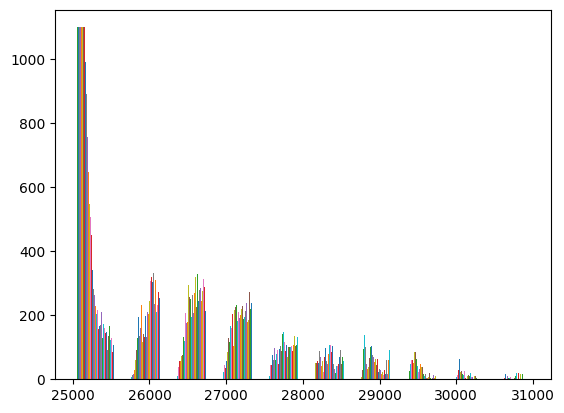

In [79]:
new_data = replace_over_by_value(new_data, 31000, 31000)
plt.hist(new_data)

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 1000, 'height': 1100, 'count': 1, 'crs': CRS.from_epsg(32631), 'transform': Affine(30.0, 0.0, 281685.0,
       0.0, -30.0, 5505915.0)}


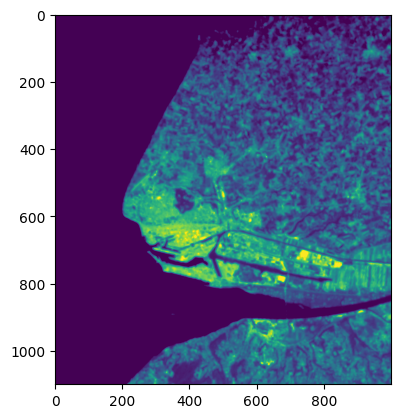

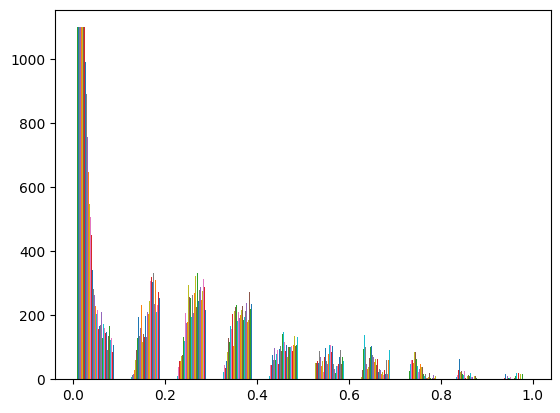

In [80]:
new = reshape_values(new_data)
save_new_raster(paths[i], file_names[i], new)
with rasterio.open(file_names[i]) as data :
    print(data.meta)
    band= data.read(1)
    show(band)
    plt.hist(band)

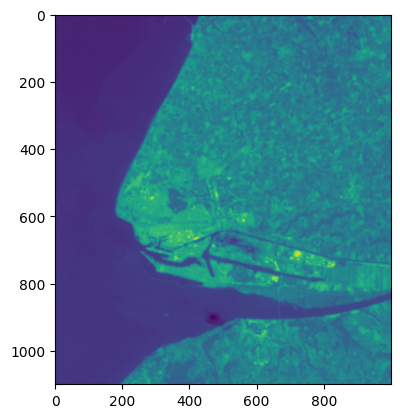

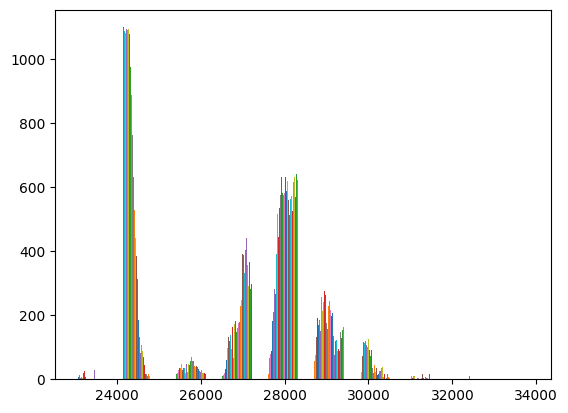

In [81]:
i = 5
with rasterio.open(paths[i])  as data :
    band1=data.read(1)
    show(band1)
    plt.hist(band1)

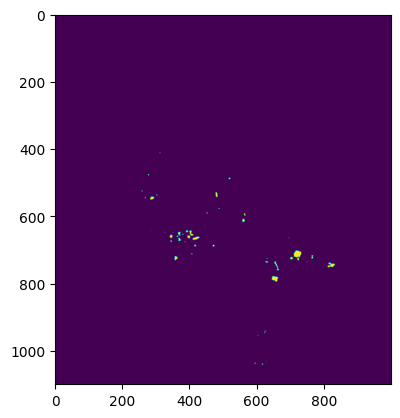

<Axes: >

In [88]:
show(band1>31000)

(array([[1100.,    0.,    0., ...,    0.,    0.,    0.],
        [1100.,    0.,    0., ...,    0.,    0.,    0.],
        [1100.,    0.,    0., ...,    0.,    0.,    0.],
        ...,
        [  64.,  524.,  358., ...,    0.,    0.,    0.],
        [  68.,  534.,  356., ...,    0.,    0.,    0.],
        [  70.,  554.,  341., ...,    0.,    0.,    0.]]),
 array([26000. , 26791.9, 27583.8, 28375.7, 29167.6, 29959.5, 30751.4,
        31543.3, 32335.2, 33127.1, 33919. ]),
 <a list of 1000 BarContainer objects>)

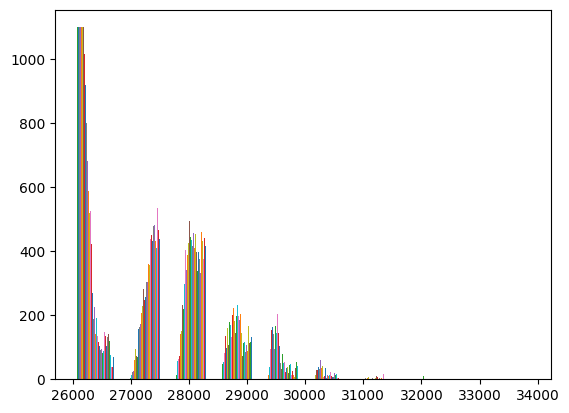

In [85]:
new_data = replace_by_value(band1, 26000, 26000)
plt.hist(new_data)

(array([[1100.,    0.,    0., ...,    0.,    0.,    0.],
        [1100.,    0.,    0., ...,    0.,    0.,    0.],
        [1100.,    0.,    0., ...,    0.,    0.,    0.],
        ...,
        [  29.,   92.,  399., ...,    0.,    0.,    0.],
        [  31.,   99.,  408., ...,    0.,    0.,    0.],
        [  30.,  107.,  424., ...,    0.,    0.,    0.]]),
 array([26000., 26500., 27000., 27500., 28000., 28500., 29000., 29500.,
        30000., 30500., 31000.]),
 <a list of 1000 BarContainer objects>)

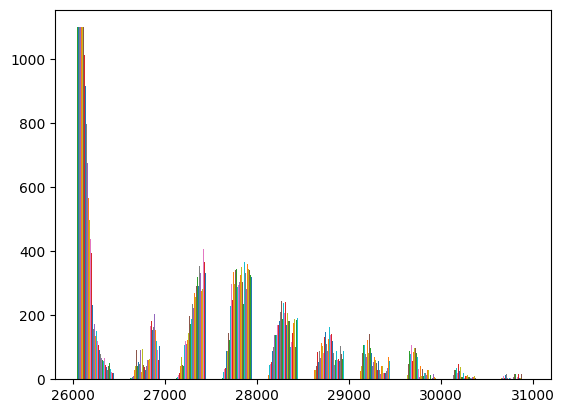

In [89]:
new_data = replace_over_by_value(new_data, 31000, 31000)
plt.hist(new_data)

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 1000, 'height': 1100, 'count': 1, 'crs': CRS.from_epsg(32631), 'transform': Affine(30.0, 0.0, 282285.0,
       0.0, -30.0, 5505915.0)}


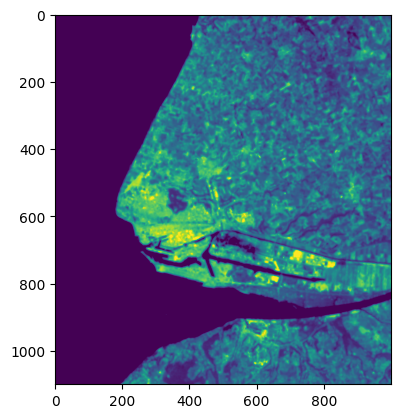

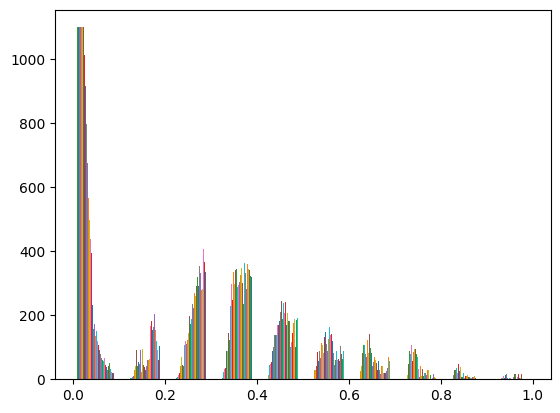

In [90]:
new = reshape_values(new_data)
save_new_raster(paths[i], file_names[i], new)
with rasterio.open(file_names[i]) as data :
    print(data.meta)
    band= data.read(1)
    show(band)
    plt.hist(band)

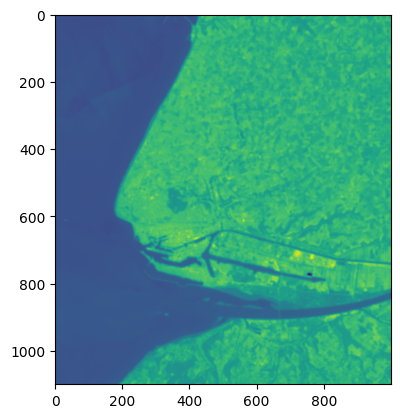

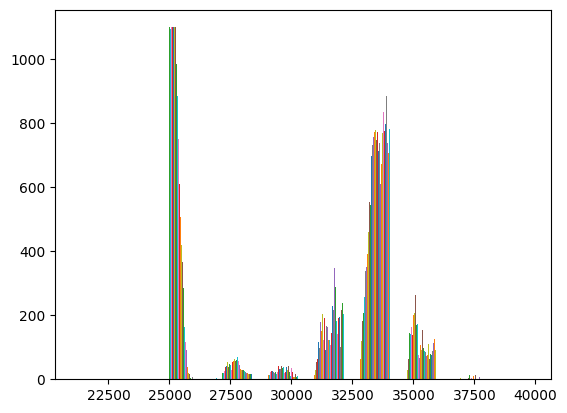

In [91]:
i = 6
with rasterio.open(paths[i])  as data :
    band1=data.read(1)
    show(band1)
    plt.hist(band1)

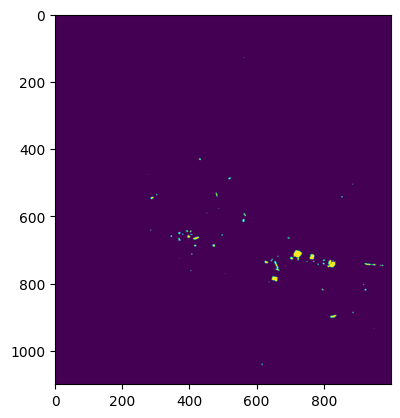

<Axes: >

In [98]:
show(band1>36000)

(array([[1100.,    0.,    0., ...,    0.,    0.,    0.],
        [1100.,    0.,    0., ...,    0.,    0.,    0.],
        [1100.,    0.,    0., ...,    0.,    0.,    0.],
        ...,
        [  16.,    4.,   12., ...,    0.,    0.,    0.],
        [  15.,    5.,   10., ...,    0.,    0.,    0.],
        [  16.,    4.,   10., ...,    0.,    0.,    0.]]),
 array([27000., 28290., 29580., 30870., 32160., 33450., 34740., 36030.,
        37320., 38610., 39900.]),
 <a list of 1000 BarContainer objects>)

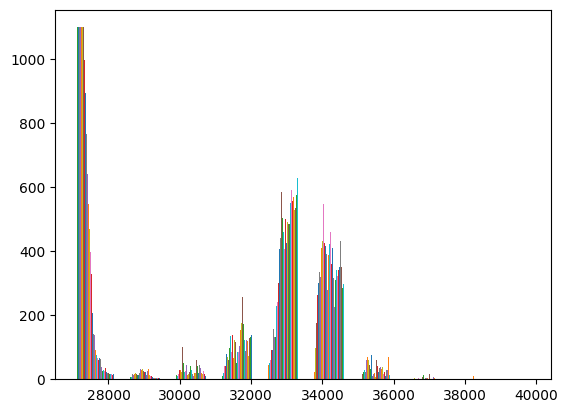

In [95]:
new_data = replace_by_value(band1, 27000, 27000)
plt.hist(new_data)

(array([[1.10e+03, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
        [1.10e+03, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
        [1.10e+03, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
        ...,
        [1.30e+01, 5.00e+00, 3.00e+00, ..., 3.34e+02, 1.29e+02, 1.00e+00],
        [1.30e+01, 4.00e+00, 4.00e+00, ..., 3.53e+02, 1.22e+02, 1.00e+00],
        [1.20e+01, 6.00e+00, 2.00e+00, ..., 3.53e+02, 1.09e+02, 3.00e+00]]),
 array([27000., 27900., 28800., 29700., 30600., 31500., 32400., 33300.,
        34200., 35100., 36000.]),
 <a list of 1000 BarContainer objects>)

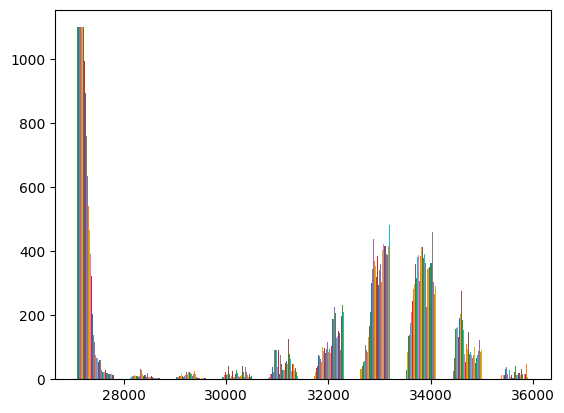

In [99]:
new_data = replace_over_by_value(new_data, 36000, 36000)
plt.hist(new_data)

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 1000, 'height': 1100, 'count': 1, 'crs': CRS.from_epsg(32631), 'transform': Affine(30.0, 0.0, 282285.0,
       0.0, -30.0, 5505915.0)}


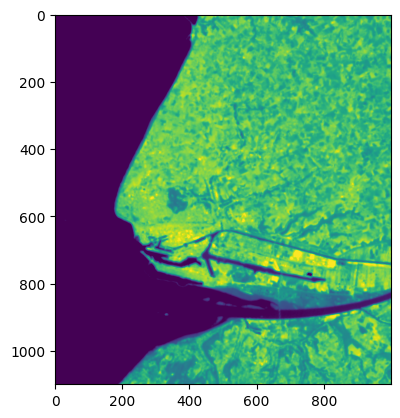

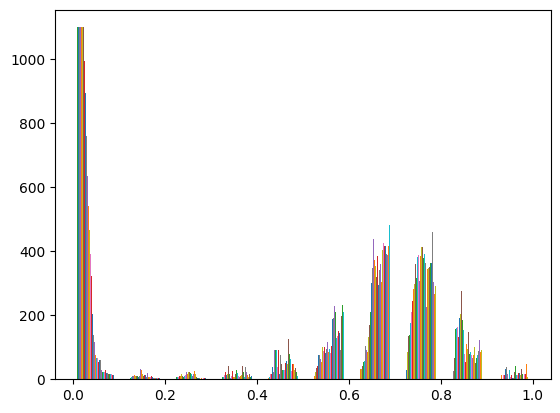

In [100]:
new = reshape_values(new_data)
save_new_raster(paths[i], file_names[i], new)
with rasterio.open(file_names[i]) as data :
    print(data.meta)
    band= data.read(1)
    show(band)
    plt.hist(band)

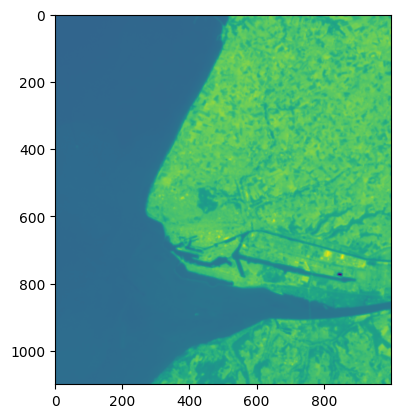

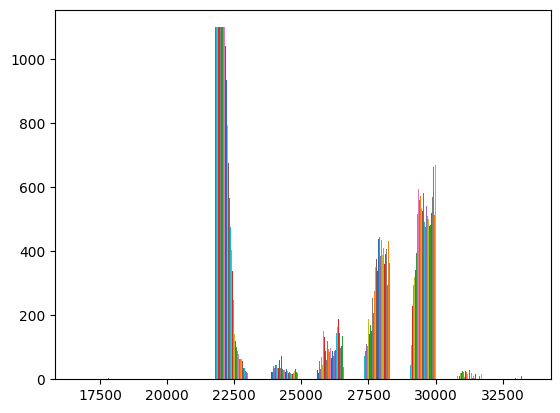

In [101]:
i = 7
with rasterio.open(paths[i])  as data :
    band1=data.read(1)
    show(band1)
    plt.hist(band1)

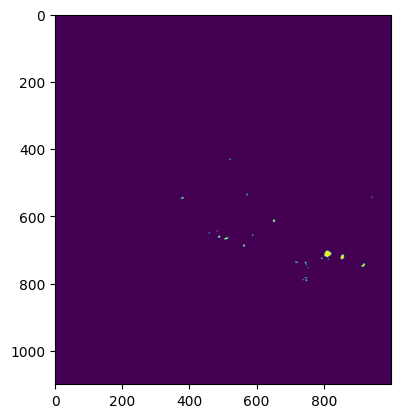

<Axes: >

In [108]:
show(band1>31000)

(array([[1100.,    0.,    0., ...,    0.,    0.,    0.],
        [1100.,    0.,    0., ...,    0.,    0.,    0.],
        [1100.,    0.,    0., ...,    0.,    0.,    0.],
        ...,
        [  19.,    5.,   13., ...,    0.,    0.,    0.],
        [  20.,    4.,   21., ...,    0.,    0.,    0.],
        [  19.,    7.,   19., ...,    4.,    0.,    0.]]),
 array([23000. , 24062.5, 25125. , 26187.5, 27250. , 28312.5, 29375. ,
        30437.5, 31500. , 32562.5, 33625. ]),
 <a list of 1000 BarContainer objects>)

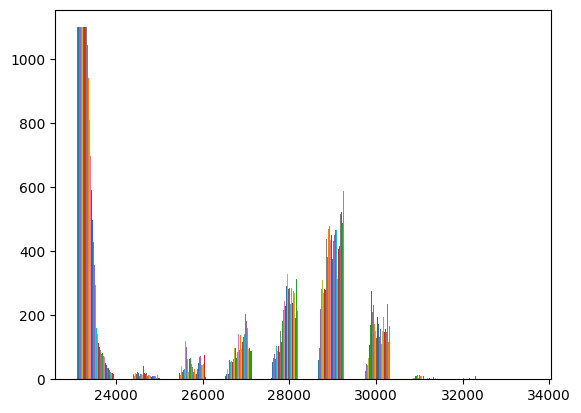

In [106]:
new_data = replace_by_value(band1, 23000, 23000)
plt.hist(new_data)

(array([[1100.,    0.,    0., ...,    0.,    0.,    0.],
        [1100.,    0.,    0., ...,    0.,    0.,    0.],
        [1100.,    0.,    0., ...,    0.,    0.,    0.],
        ...,
        [  19.,    3.,    2., ...,  424.,  164.,    5.],
        [  18.,    5.,    3., ...,  428.,  156.,    7.],
        [  16.,    7.,    4., ...,  424.,  150.,    8.]]),
 array([23000., 23800., 24600., 25400., 26200., 27000., 27800., 28600.,
        29400., 30200., 31000.]),
 <a list of 1000 BarContainer objects>)

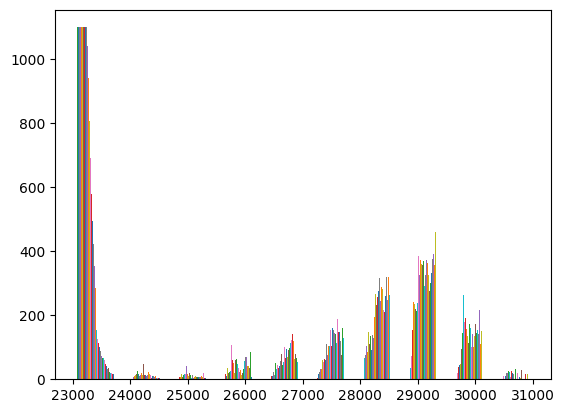

In [109]:
new_data = replace_over_by_value(new_data, 31000, 31000)
plt.hist(new_data)

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 1000, 'height': 1100, 'count': 1, 'crs': CRS.from_epsg(32631), 'transform': Affine(30.0, 0.0, 279585.0,
       0.0, -30.0, 5505915.0)}


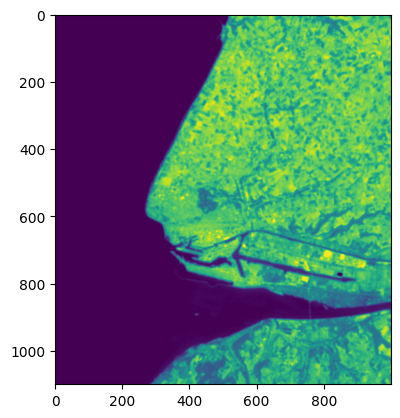

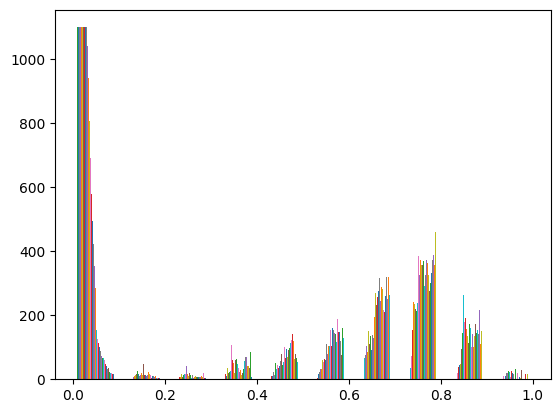

In [110]:
new = reshape_values(new_data)
save_new_raster(paths[i], file_names[i], new)
with rasterio.open(file_names[i]) as data :
    print(data.meta)
    band= data.read(1)
    show(band)
    plt.hist(band)

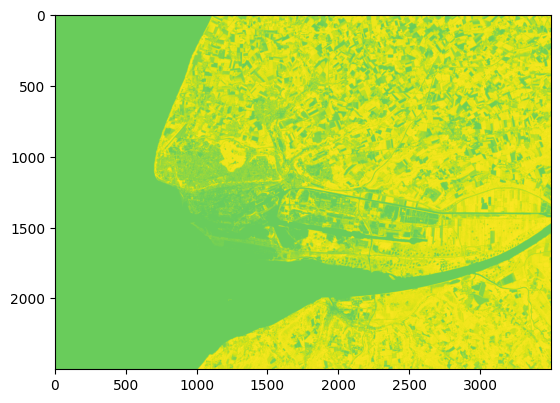

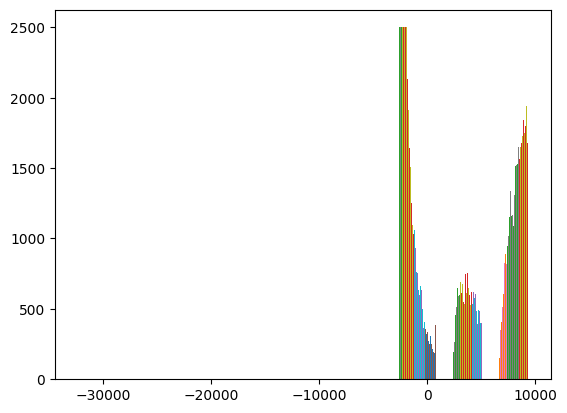

In [111]:
i = 8
with rasterio.open(paths[i])  as data :
    band1=data.read(1)
    show(band1)
    plt.hist(band1)

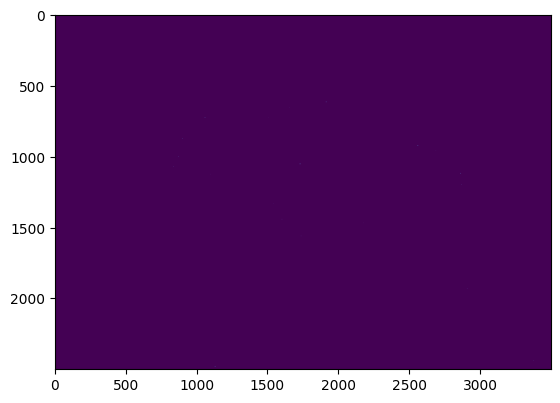

<Axes: >

In [112]:
show(band1<0)

(array([[2500.,    0.,    0., ...,    0.,    0.,    0.],
        [2500.,    0.,    0., ...,    0.,    0.,    0.],
        [2500.,    0.,    0., ...,    0.,    0.,    0.],
        ...,
        [ 242.,  103.,  110., ...,  202.,  584.,  779.],
        [ 258.,  104.,  124., ...,  210.,  574.,  746.],
        [ 287.,   93.,  119., ...,  222.,  573.,  744.]]),
 array([   0. ,  977.1, 1954.2, 2931.3, 3908.4, 4885.5, 5862.6, 6839.7,
        7816.8, 8793.9, 9771. ]),
 <a list of 3500 BarContainer objects>)

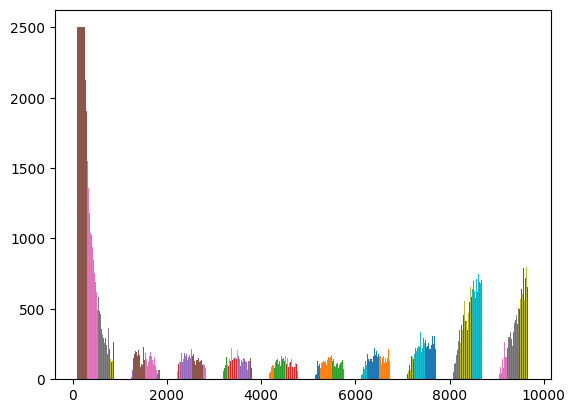

In [113]:
new_data = replace_by_value(band1, 0, 0)
plt.hist(new_data)

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 3500, 'height': 2500, 'count': 1, 'crs': CRS.from_epsg(32630), 'transform': Affine(10.0, 0.0, 714960.0,
       0.0, -10.0, 5500020.0)}


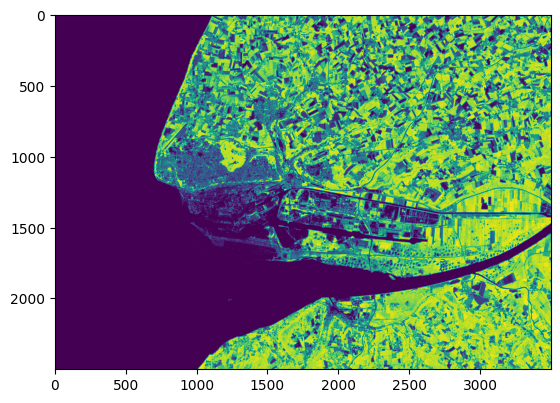

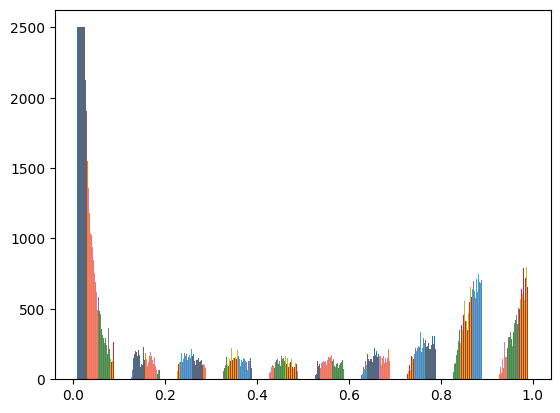

In [114]:
new = reshape_values(new_data)
save_new_raster(paths[i], file_names[i], new)
with rasterio.open(file_names[i]) as data :
    print(data.meta)
    band= data.read(1)
    show(band)
    plt.hist(band)

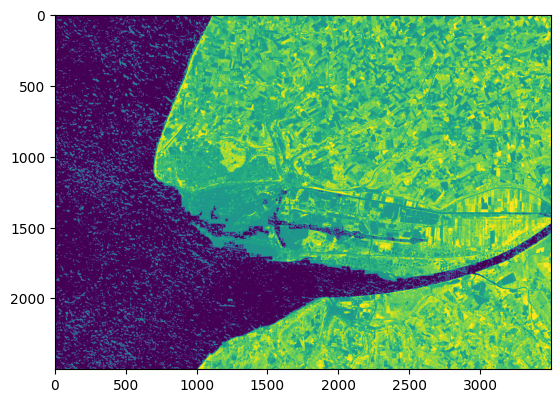

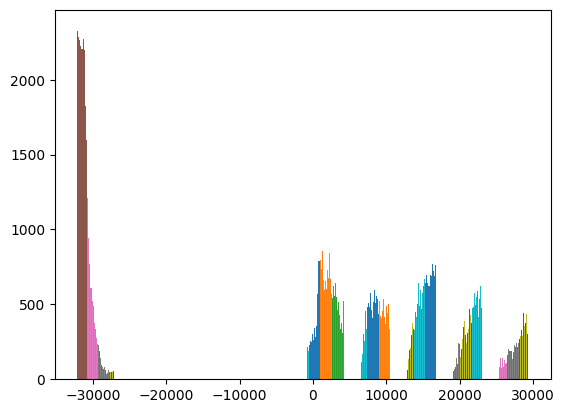

In [115]:
i = 9
with rasterio.open(paths[i])  as data :
    band1=data.read(1)
    show(band1)
    plt.hist(band1)

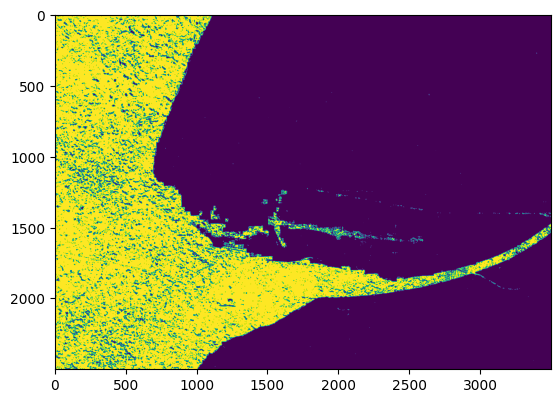

<Axes: >

In [116]:
show(band1<0)

(array([[2500.,    0.,    0., ...,    0.,    0.,    0.],
        [2500.,    0.,    0., ...,    0.,    0.,    0.],
        [2500.,    0.,    0., ...,    0.,    0.,    0.],
        ...,
        [ 413.,  179.,  186., ...,  210.,  130.,  187.],
        [ 445.,  172.,  195., ...,  194.,  106.,  203.],
        [ 461.,  156.,  194., ...,  184.,  103.,  217.]]),
 array([    0.,  3000.,  6000.,  9000., 12000., 15000., 18000., 21000.,
        24000., 27000., 30000.]),
 <a list of 3500 BarContainer objects>)

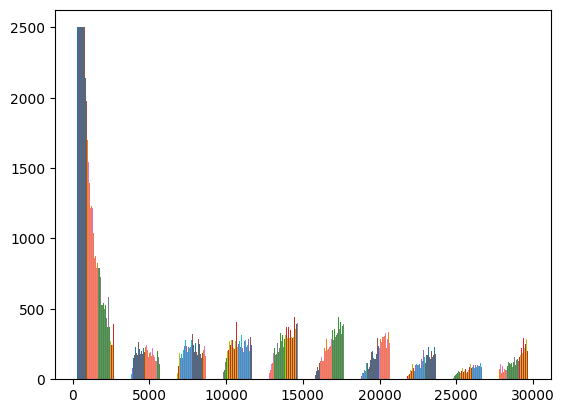

In [117]:
new_data = replace_by_value(band1, 0, 0)
plt.hist(new_data)

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 3500, 'height': 2500, 'count': 1, 'crs': CRS.from_epsg(32630), 'transform': Affine(10.0, 0.0, 714960.0,
       0.0, -10.0, 5500020.0)}


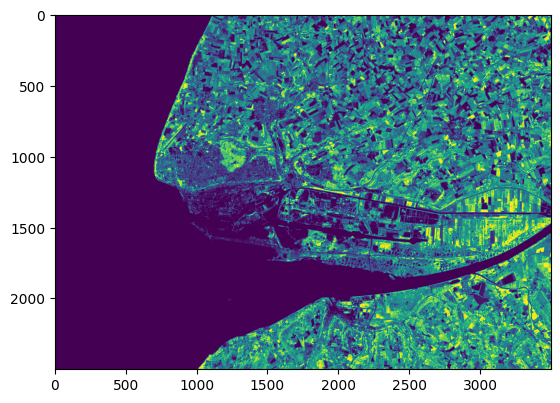

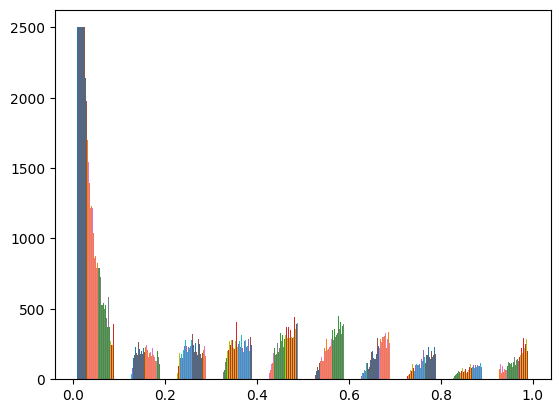

In [118]:
new = reshape_values(new_data)
save_new_raster(paths[i], file_names[i], new)
with rasterio.open(file_names[i]) as data :
    print(data.meta)
    band= data.read(1)
    show(band)
    plt.hist(band)

In [119]:
i = 10
with rasterio.open(paths[i])  as data :
    band1=data.read(1)
    show(band1)
    plt.hist(band1)

IndexError: list index out of range